# Assingnment 1 Algo-Evaluation

SELECT best algorithm for given data set

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data Ingestion

Read the train data

In [2]:
import pandas as pd
df = pd.read_csv("train_machine.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


# Target - Machine failure
1. 0 - Machine Working
2. 1 - Machine failure

Step 2 - Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [4]:
df.isna().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

Step 3 - Seperate X and Y (Machine failure)

In [6]:
X = df.drop(columns=["id","Product ID","Machine failure"])
Y = df[["Machine failure"]]

In [7]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [8]:
Y.head()

,Machine failure
0,0
1,0
2,0
3,0
4,0


In [9]:
Y.value_counts()

Machine failure
0                  134281
1                    2148
Name: count, dtype: int64

<Axes: xlabel='Machine failure'>

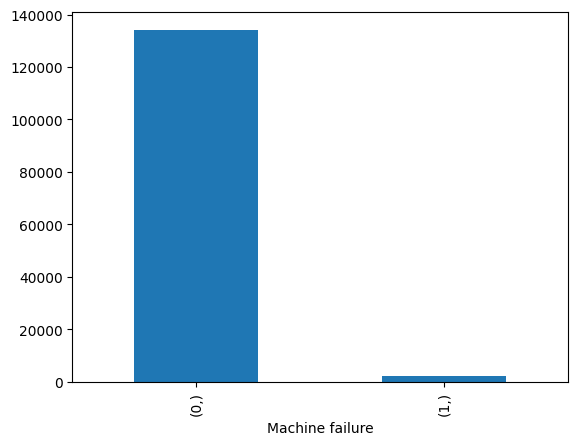

In [10]:
Y.value_counts().plot(kind="bar")

# Step 4 - Apply Preprocessing on X

In [11]:
X.dtypes

Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
cat

['Type']

In [14]:
con

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

In [17]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
)

In [18]:
pre = ColumnTransformer(
    [
        ("num", num_pipe, con),
        ("cat", cat_pipe, cat)
    ]
).set_output(transform="pandas")

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0


# Step 5 - Apply Train Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:

xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [22]:
xtrain.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
12407,0.879169,0.547897,-0.283496,0.394175,-0.428500,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
85011,0.449579,-0.318424,-0.492526,0.358890,-0.303431,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
65292,-0.731794,-0.607197,-1.119615,1.958477,-1.210180,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,0.0,1.0
18478,0.932868,0.547897,0.163396,-0.993701,-1.382149,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
100267,-0.516999,-0.968164,0.812109,-0.876084,0.306279,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [23]:
ytrain.head()

,Machine failure
12407,0
85011,0
65292,0
18478,0
100267,0


In [24]:
xtest.head()

,num__Air temperature [K],num__Process temperature [K],num__Rotational speed [rpm],num__Torque [Nm],num__Tool wear [min],num__TWF,num__HDF,num__PWF,num__OSF,num__RNF,cat__Type_L,cat__Type_M
123128,0.556977,0.547897,-1.097992,2.546560,-1.444684,-0.03945,-0.072021,-0.049016,15.863363,-0.047568,1.0,0.0
54705,0.342182,0.981058,0.163396,-0.511473,1.338097,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
40016,0.395880,0.331317,-0.153753,-0.217431,0.149943,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
75025,-1.215083,-1.112551,-0.132129,-0.217431,0.400081,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0
120421,0.503278,0.547897,0.134564,-0.217431,1.541334,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0,0.0


In [25]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [26]:
xtrain.shape

(109143, 12)

# Step 6 - Algorithm Evaluation

1.Dataset has around 50000 rows which is not suitable for KNN and SVM

In [27]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [29]:
# Create base model for all algorithms
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

In [30]:
type(models[0]).__name__

'LogisticRegression'

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

In [32]:
def evaluate_single_model(model, xtrain, ytrain, xtest, ytest):
    # Fit the model on train data
    model.fit(xtrain, ytrain)
    
    # Predict results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Calculate f1_macro for train and test
    f1_train = f1_score(ytrain, ypred_train, average="macro")
    f1_test = f1_score(ytest, ypred_test, average="macro")

    # Get 5 fold cross validated score on train data
    scores = cross_val_score(model, xtrain, ytrain, scoring="f1_macro", cv=5, n_jobs=-1)
    f1_cv = scores.mean()

    # Store above results in dictionary
    r = {
        "name": type(model).__name__,
        "model": model,
        "f1_train": f1_train,
        "f1_test": f1_test,
        "f1_cv": f1_cv
    }

    # return the results dictionary
    return r
def evaluate_all_models(models: list, xtrain, ytrain, xtest, ytest):
    # Intialize a results list
    res = []

    # Evalutate all models
    for model in models:
        r = evaluate_single_model(model, xtrain, ytrain, xtest, ytest)
        print(r)
        res.append(r)

    # Convert the res to dataframe
    res_df = pd.DataFrame(res)
    # Sort the values by f1_cv
    res_df = res_df.sort_values(by="f1_cv", ascending=False).reset_index(drop=True)
    # Choose the best model
    best_model = res_df.loc[0, "model"]

    # Return best model and res_df
    return res_df, best_model 

In [33]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [34]:
res_df, best_model = evaluate_all_models(models, xtrain.values, ytrain.values, xtest.values, ytest.values)


{'name': 'LogisticRegression', 'model': LogisticRegression(), 'f1_train': 0.9302961192536252, 'f1_test': 0.9314565053016582, 'f1_cv': np.float64(0.9301488260252861)}
{'name': 'DecisionTreeClassifier', 'model': DecisionTreeClassifier(), 'f1_train': 0.9974641142940155, 'f1_test': 0.8788528087531318, 'f1_cv': np.float64(0.8727917596837301)}
{'name': 'RandomForestClassifier', 'model': RandomForestClassifier(), 'f1_train': 0.9974728788238415, 'f1_test': 0.9310660054302231, 'f1_cv': np.float64(0.927804316343893)}
{'name': 'GradientBoostingClassifier', 'model': GradientBoostingClassifier(), 'f1_train': 0.9357206926028346, 'f1_test': 0.9308524696197871, 'f1_cv': np.float64(0.9286656772609063)}
{'name': 'XGBClassifier', 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_type

In [35]:
res_df

,name,model,f1_train,f1_test,f1_cv
0,LogisticRegression,LogisticRegression(),0.930296,0.931457,0.930149
1,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.946437,0.931240,0.928780
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.935721,0.930852,0.928666
3,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.997473,0.931066,0.927804
4,DecisionTreeClassifier,DecisionTreeClassifier(),0.997464,0.878853,0.872792


In [36]:
best_model

LogisticRegression()

# Step 7 - Best Model Evaluation

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay

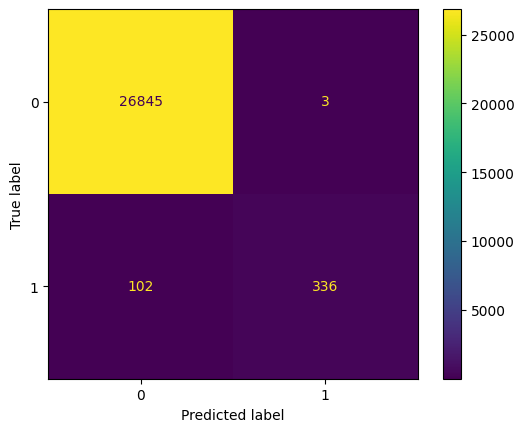

In [38]:
ConfusionMatrixDisplay.from_estimator(best_model, xtest, ytest)

In [39]:
ypred_test = best_model.predict(xtest)

In [40]:
ypred_test[0:5]

array([1, 0, 0, 0, 0])

In [41]:
ytest.head()

,Machine failure
123128,1
54705,0
40016,0
75025,0
120421,0


In [42]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26848
           1       0.99      0.77      0.86       438

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



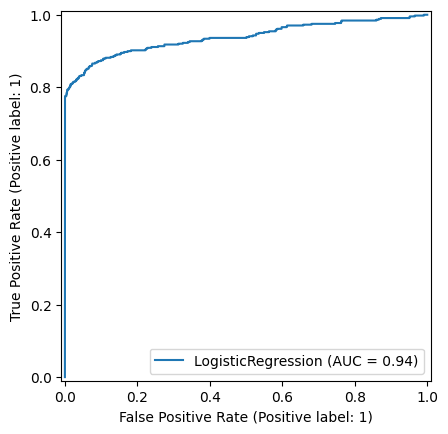

In [43]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, xtest, ytest)

In [44]:
scores_auc = cross_val_score(best_model, xtrain, ytrain, scoring="roc_auc", cv=5, n_jobs=-1)
scores_auc

array([0.94072841, 0.9315696 , 0.95419657, 0.92792845, 0.9263906 ])

In [45]:
scores_auc.mean()

np.float64(0.93616272472422)

From above results it is clear that them model is good model 

XGB is tree based model you can show feature importances

In [46]:
best_model.feature_importances_

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

In [ ]:
xtrain.columns

Index(['num__Air temperature [K]', 'num__Process temperature [K]',
       'num__Rotational speed [rpm]', 'num__Torque [Nm]',
       'num__Tool wear [min]', 'num__TWF', 'num__HDF', 'num__PWF', 'num__OSF',
       'num__RNF', 'cat__Type_L', 'cat__Type_M'],
      dtype='object')

In [ ]:
imp = pd.Series(best_model.feature_importances_,index=xtrain.columns)
imp

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'